# Logistic Map

We study one-dimensional logistic map:

$$ x_{n+1} = ax_n(1 - x_n) $$

where $n = 0, 1, ...$

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
import numba as nb
from matplotlib import pyplot as plt

First we define the function to calculate nth element of a logistic map

In [2]:
x_n_plus1, x_n, a = sp.symbols('x_{n+1} x_n a')
x_n_plus1

x_{n+1}

In [3]:
x_n

x_n

In [4]:
quadratic_map = sp.Eq(x_n_plus1, a*x_n * (1 - x_n))
quadratic_map

Eq(x_{n+1}, a*x_n*(1 - x_n))

In [5]:
@nb.njit()
def logistic_map_expression(x, a):
    return a * x * (1 - x)

In [6]:
x_0, n = 0.1, 51
a_list = [2.9, 3.1]
logistic_maps = [logistic_map(x_0, n, logistic_map_expression, a) for a in a_list]

In [7]:
def plot_logistic_maps(maps, a_params, map_expr):
    figure, axes = plt.subplots(1, len(maps), layout='constrained', figsize=(2 + 5*len(maps), 6))
    for ax, map_, a in zip(figure.axes, maps, a_params):
        ax.scatter(np.arange(len(map_)), map_, color='black')
        ax.set(xlabel='$n$', ylabel='$x_n$', title=f'$a = {a}$')
        ax.grid()
    figure.suptitle(f'Logistic map\n${sp.latex(map_expr)}$')

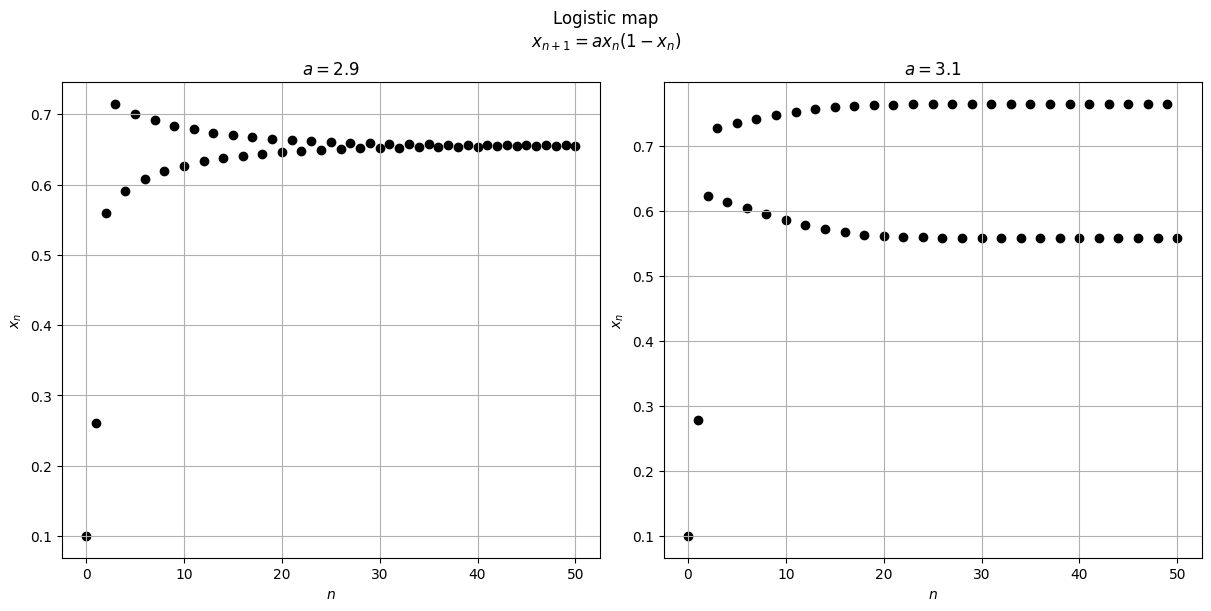

In [8]:
plot_logistic_maps(logistic_maps, a_list, quadratic_map)

In [9]:
def plot_bifurcation_diagram(bifurcation_diagram, a_params, skip, map_expr, scatter_params, axes_params):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 7))
    for param, column in zip(a_params, bifurcation_diagram):
        y_axis_values = column[skip:]
        axes.scatter(np.full(len(y_axis_values), param), y_axis_values, **scatter_params)
    title = f'Bifurcation Diagram\n${sp.latex(map_expr)}$\n$x_0 = {x_0}$, $n \in ({skip}, {bifurcation_diagram.shape[1]-1})$'
    axes.set(xlabel='$a$', ylabel='$x_n$', title=title, **axes_params)

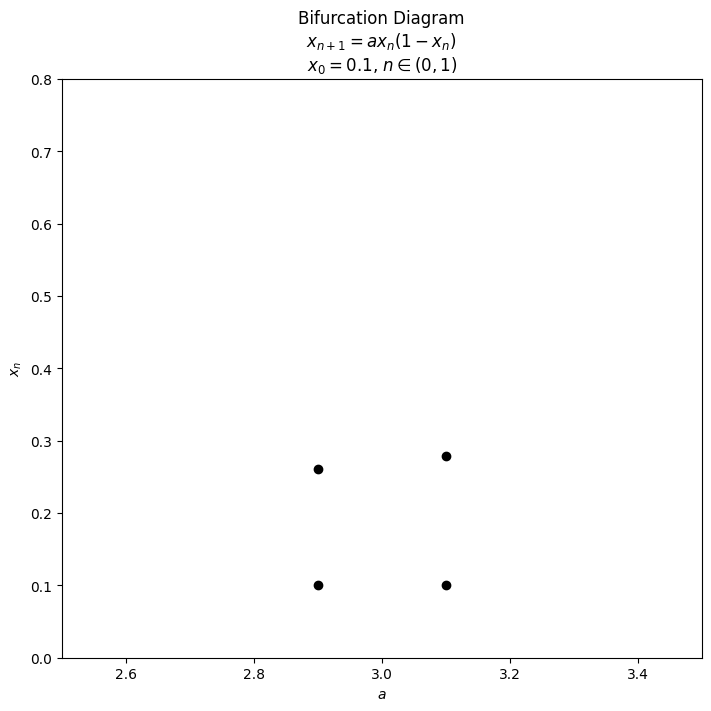

In [10]:
diagram = logistic_map_parameter_dependence(x_0, 2, logistic_map_expression, np.array(a_list))
plot_bifurcation_diagram(diagram, a_list, 0, quadratic_map, {'color': 'black'}, {'xlim': (2.5, 3.5), 'ylim':(0, 0.8)})

### Now we plot bifurcation diagram in the interval $(2.9, 4)$

In [11]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 2.9, 4, 500
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, logistic_map_expression, a_interval)

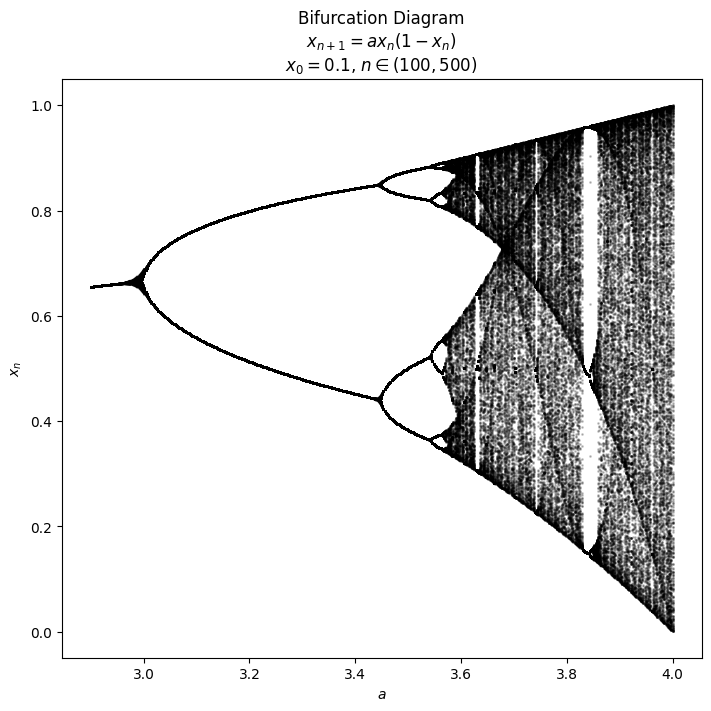

In [12]:
plot_bifurcation_diagram(diagram, a_interval, skip, quadratic_map, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

In [13]:
x_0, n, skip = 0.5, 501, 100
a_start, a_end, quality = 1, 4, 1500
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, logistic_map_expression, a_interval)

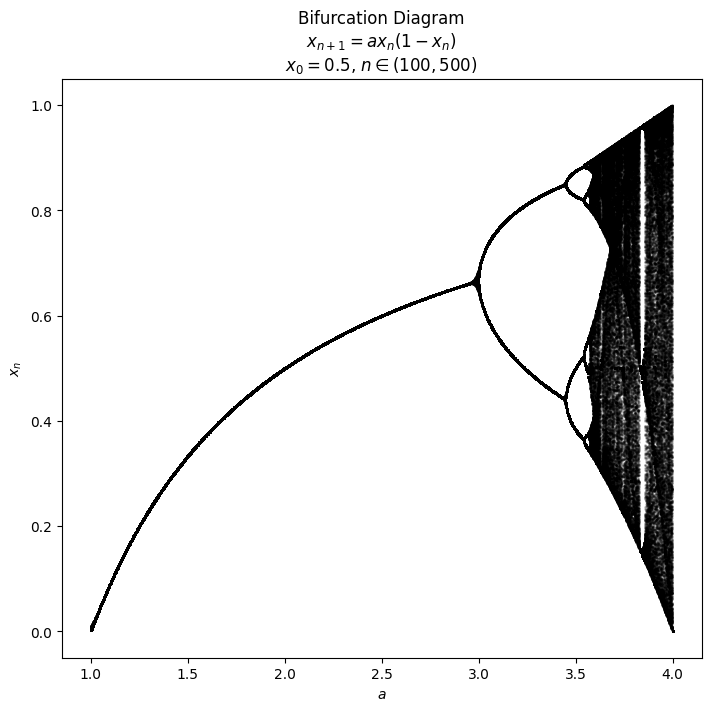

In [14]:
plot_bifurcation_diagram(diagram, a_interval, skip, quadratic_map, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

In [15]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 3.6, 4, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, logistic_map_expression, a_interval)

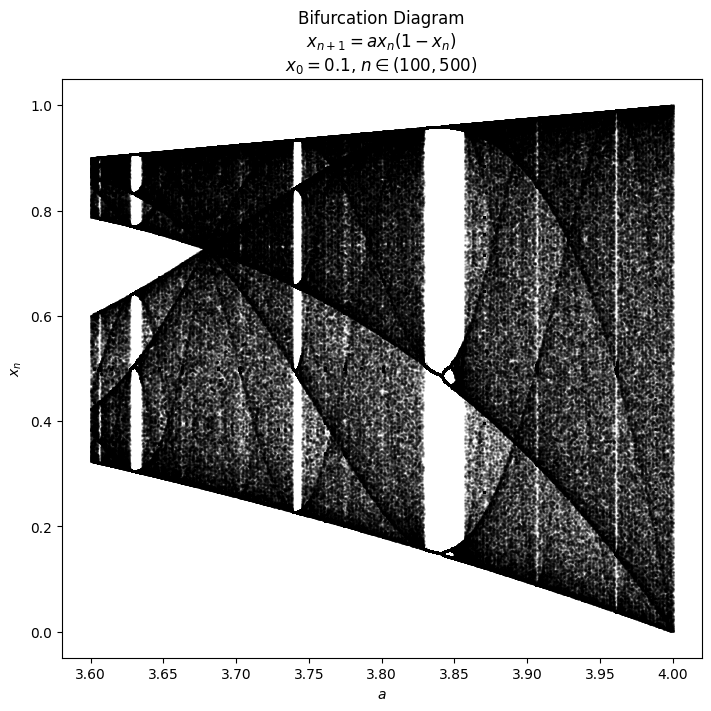

In [16]:
plot_bifurcation_diagram(diagram, a_interval, skip, quadratic_map, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

In [17]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 3.4, 3.64, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, logistic_map_expression, a_interval)

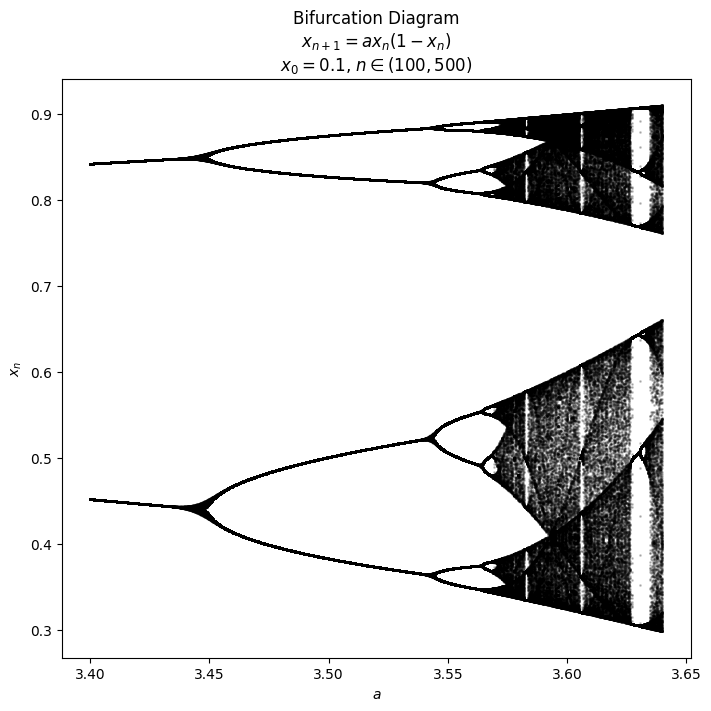

In [18]:
plot_bifurcation_diagram(diagram, a_interval, skip, quadratic_map, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

# Cubic map 

$$ x_{n+1} = ax_n - x_n^3 $$

In [19]:
cubic_map = sp.Eq(x_n_plus1, a*x_n * (1 - x_n**2))
cubic_map

Eq(x_{n+1}, a*x_n*(1 - x_n**2))

In [20]:
@nb.njit()
def cubic_map_expression(x, a):
    return a * x * (1 - x**2)

In [21]:
x_0, n = 0.1, 51
a_list = [1, 2]
logistic_maps = [logistic_map(x_0, n, cubic_map_expression, a) for a in a_list]

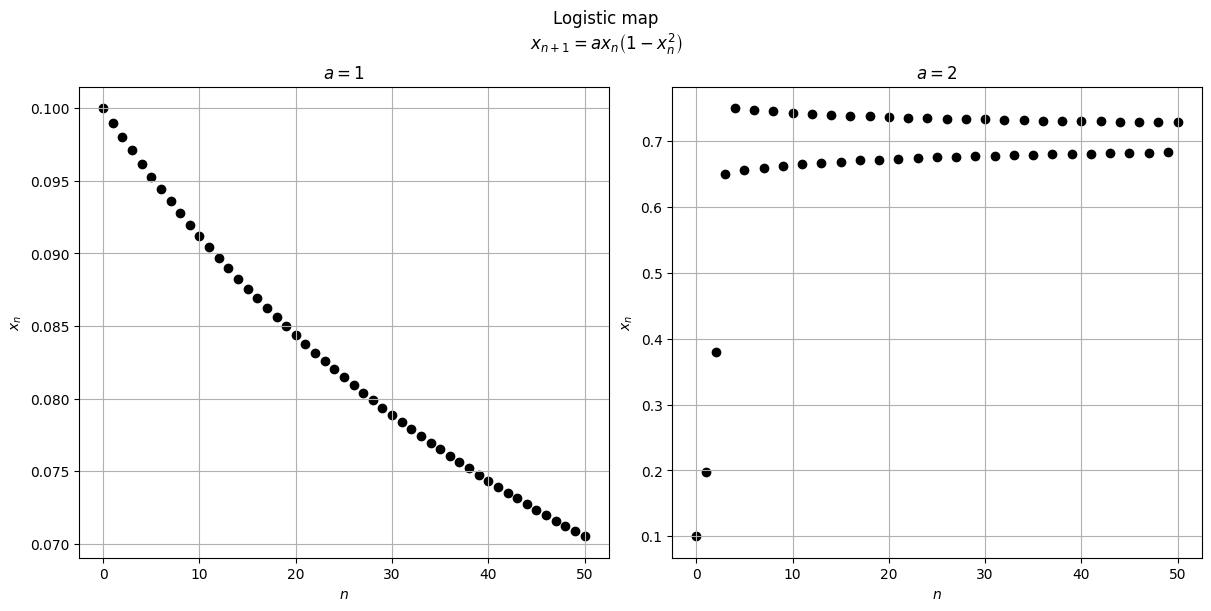

In [22]:
plot_logistic_maps(logistic_maps, a_list, cubic_map)

In [23]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 1, 3.2, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, cubic_map_expression, a_interval)

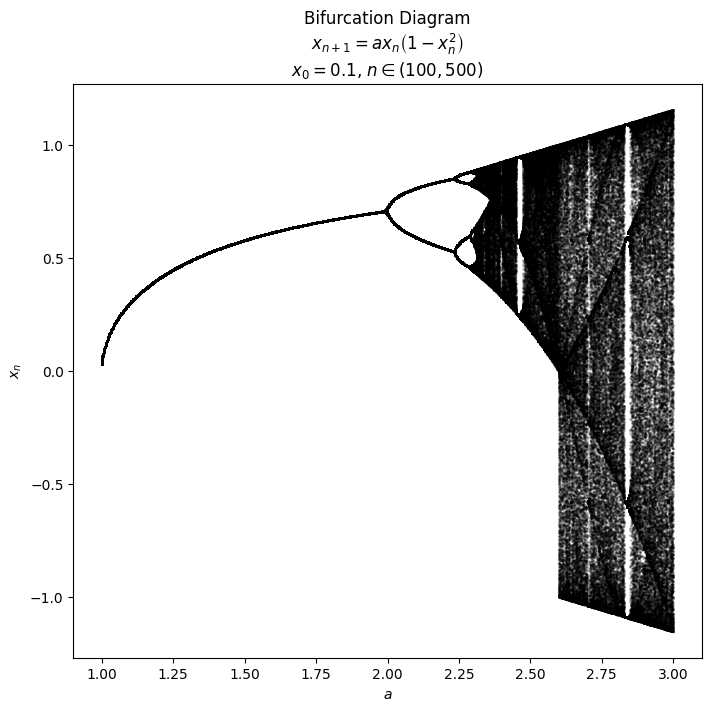

In [24]:
plot_bifurcation_diagram(diagram, a_interval, skip, cubic_map, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

In [25]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 1.8, 3, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, cubic_map_expression, a_interval)

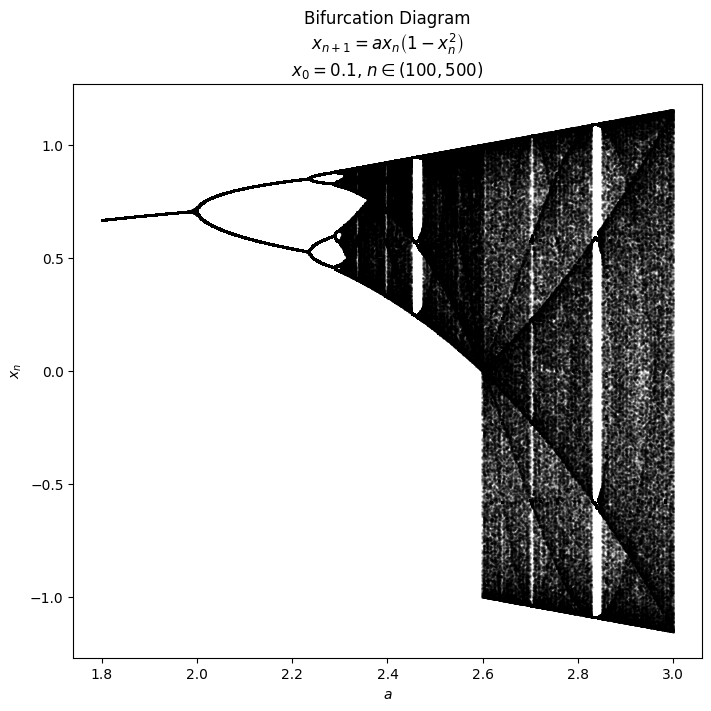

In [26]:
plot_bifurcation_diagram(diagram, a_interval, skip, cubic_map, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

In [27]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 2.5, 2.7, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, cubic_map_expression, a_interval)

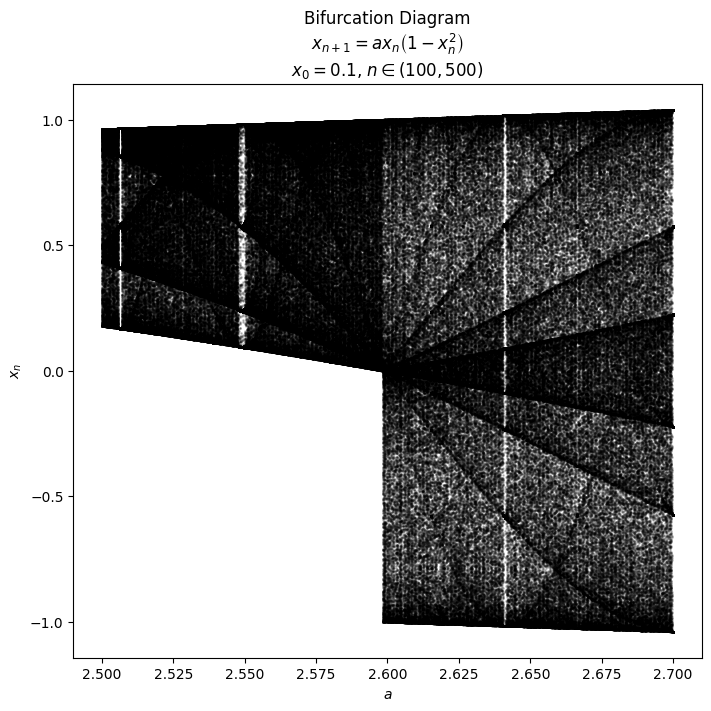

In [28]:
plot_bifurcation_diagram(diagram, a_interval, skip, cubic_map, {'color': 'black', 's': 1, 'alpha': 0.2}, {})